# Pre processing step to reduce the affect of illumination in imags

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('/home/dasec-notebook/Thesis/OFIQ-Project/python')

from ofiq_zmq import OfiqZmq

In [1]:
image_paths = [
    '/home/dasec-notebook/Thesis/Datasets/CHROMA-FIT-Dataset/DATA_CROPPED_PORTRAIT2/00129/DSC_1137.JPG', 
    '/home/dasec-notebook/Thesis/Datasets/CHROMA-FIT-Dataset/DATA_CROPPED_PORTRAIT2/00171/DSC_1519.JPG', 
    '/home/dasec-notebook/Thesis/Datasets/CHROMA-FIT-Dataset/DATA_CROPPED_PORTRAIT2/00145/DSC_2768.JPG', 
    '/home/dasec-notebook/Thesis/Datasets/mst-e_data/mst-e_data_portrait/subject_18/PXL_20220922_183620053.PORTRAIT.jpg']


Gamma Correction

To correct the brightness of an image by  adjusts the luminance of the image based on a gamma value

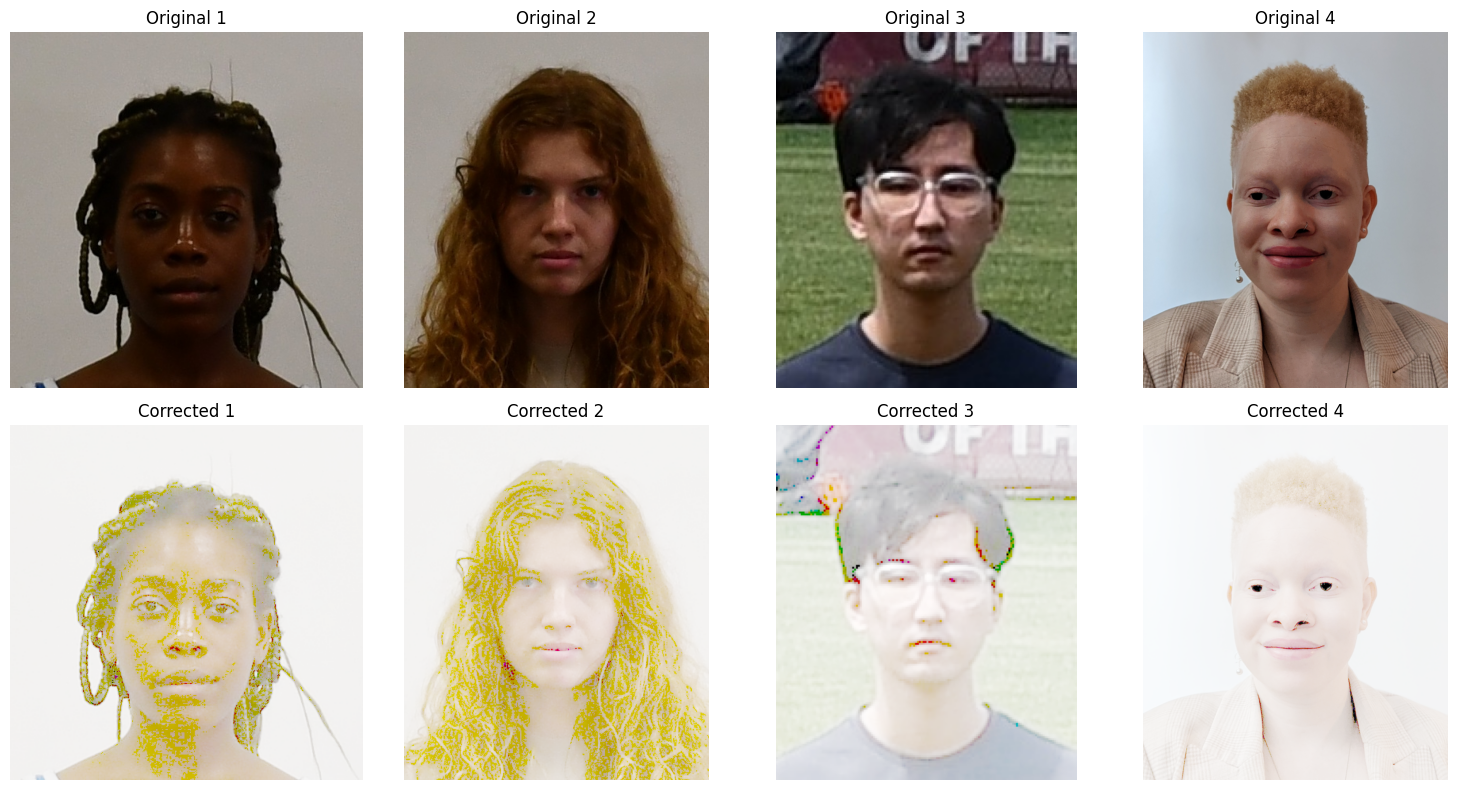

In [53]:


# Gamma correction function
def gamma_correction(image, gamma=1.2):
    # Normalize the image to [0, 1], then apply the gamma correction
    image_normalized = image / 255.0
    corrected_image = np.power(image_normalized, gamma) * 255
    corrected_image = np.uint8(np.clip(corrected_image, 0, 255))  # Convert back to [0, 255]
    return corrected_image

# Load four images (replace 'image1.jpg', 'image2.jpg', etc. with your actual image paths)
images = [cv2.imread(img_path) for img_path in image_paths]

# Apply gamma correction to each image
gamma_value = 0.1 # You can adjust this value for different effects
corrected_images = [gamma_correction(img, gamma_value) for img in images]

# Convert BGR to RGB for display (OpenCV uses BGR by default)
images_rgb = [cv2.cvtColor(img, cv2.COLOR_BGR2RGB) for img in images]
corrected_images_rgb = [cv2.cvtColor(img, cv2.COLOR_BGR2RGB) for img in corrected_images]

# Set up the plot to display the images in a 2x4 grid
fig, axes = plt.subplots(2, 4, figsize=(15, 8))

# Plot original images in the first row
for i, ax in enumerate(axes[0]):
    ax.imshow(images_rgb[i])
    ax.axis('off')  # Turn off axis
    ax.set_title(f"Original {i+1}")

# Plot gamma-corrected images in the second row
for i, ax in enumerate(axes[1]):
    ax.imshow(corrected_images_rgb[i])
    ax.axis('off')  # Turn off axis
    ax.set_title(f"Corrected {i+1}")

plt.tight_layout()
plt.show()


In [54]:
img_path = image_paths[0]

ofiq_zmq = OfiqZmq('/home/dasec-notebook/Thesis/OFIQ-Project')

result = ofiq_zmq.process_image(img_path)['quality_assessments']

image2 = gamma_correction(cv2.imread(img_path), 0.1)
# save image
cv2.imwrite('gamma_corrected.jpg', image2)
result2 = ofiq_zmq.process_image('gamma_corrected.jpg')['quality_assessments']




[OFIQ_zmq_app][INFO] ZeroMQ server bound to: tcp://*:40411
[OFIQ_zmq_app][INFO] OFIQ initialized.


In [55]:
(result)


{<OfiqQualityMeasure.UNIFIED_QUALITY_SCORE: 65>: OfiqQualityMeasureResult(status_code=<OfiqQualityMeasureReturnCode.SUCCESS: 0>, scalar_score=38, raw_score=21.748960494995117),
 <OfiqQualityMeasure.BACKGROUND_UNIFORMITY: 66>: OfiqQualityMeasureResult(status_code=<OfiqQualityMeasureReturnCode.SUCCESS: 0>, scalar_score=78, raw_score=47.07773647891455),
 <OfiqQualityMeasure.ILLUMINATION_UNIFORMITY: 67>: OfiqQualityMeasureResult(status_code=<OfiqQualityMeasureReturnCode.SUCCESS: 0>, scalar_score=84, raw_score=0.5559183582663536),
 <OfiqQualityMeasure.LUMINANCE_MEAN: 68>: OfiqQualityMeasureResult(status_code=<OfiqQualityMeasureReturnCode.SUCCESS: 0>, scalar_score=2, raw_score=0.011730079638244413),
 <OfiqQualityMeasure.LUMINANCE_VARIANCE: 69>: OfiqQualityMeasureResult(status_code=<OfiqQualityMeasureReturnCode.SUCCESS: 0>, scalar_score=2, raw_score=0.00013361878464616378),
 <OfiqQualityMeasure.UNDER_EXPOSURE_PREVENTION: 70>: OfiqQualityMeasureResult(status_code=<OfiqQualityMeasureReturnCode.

In [56]:
(result2)

{<OfiqQualityMeasure.UNIFIED_QUALITY_SCORE: 65>: OfiqQualityMeasureResult(status_code=<OfiqQualityMeasureReturnCode.SUCCESS: 0>, scalar_score=14, raw_score=18.1970157623291),
 <OfiqQualityMeasure.BACKGROUND_UNIFORMITY: 66>: OfiqQualityMeasureResult(status_code=<OfiqQualityMeasureReturnCode.SUCCESS: 0>, scalar_score=74, raw_score=55.49115039844181),
 <OfiqQualityMeasure.ILLUMINATION_UNIFORMITY: 67>: OfiqQualityMeasureResult(status_code=<OfiqQualityMeasureReturnCode.SUCCESS: 0>, scalar_score=84, raw_score=0.5657439556671306),
 <OfiqQualityMeasure.LUMINANCE_MEAN: 68>: OfiqQualityMeasureResult(status_code=<OfiqQualityMeasureReturnCode.SUCCESS: 0>, scalar_score=99, raw_score=0.5462347199595373),
 <OfiqQualityMeasure.LUMINANCE_VARIANCE: 69>: OfiqQualityMeasureResult(status_code=<OfiqQualityMeasureReturnCode.SUCCESS: 0>, scalar_score=78, raw_score=0.006567705093308667),
 <OfiqQualityMeasure.UNDER_EXPOSURE_PREVENTION: 70>: OfiqQualityMeasureResult(status_code=<OfiqQualityMeasureReturnCode.SUCC

[OFIQ_zmq_app][INFO] Shutdown due to receive timeout.


In [60]:
import colorspacious as cs

rgb = np.array([0.204, 0.195, 0.212]) 
xyx = rgb_to_xyY(rgb)

In [61]:
xyx

array([0.31041699, 0.32014348, 0.19814105])

Retinex Algorithm

In [ ]:
Illumination Normalization (Image Normalization)

To normalize the intensity of the image,

Shading/Lighting Compensation Techniques

hmm yeah, this is how I also understood it, but then I tried this example and the scalar values in the original are:

UNDER_EXPOSURE_PREVENTION:1, OVER_EXPOSURE_PREVENTION: 100, UNIFIED_QUALITY_SCORE: 38

but then in the gamma corrected image which is clearly over exposed:

UNDER_EXPOSURE_PREVENTION:100, OVER_EXPOSURE_PREVENTION: 100, UNIFIED_QUALITY_SCORE: 14
